In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consume-complaints-dataset-fo-nlp/complaints_processed.csv


In [ ]:
#importing dataset

In [2]:
df=pd.read_csv('/kaggle/input/consume-complaints-dataset-fo-nlp/complaints_processed.csv',index_col=0)
df.head(10)

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
5,credit_reporting,payment history missing credit report made mis...
6,credit_reporting,va date complaint experian credit bureau invol...
7,credit_reporting,account reported abbreviated name full name se...
8,credit_reporting,account reported abbreviated name full name se...
9,credit_reporting,usdoexxxx account reported abbreviated name fu...


In [3]:
df[['narrative']]

,narrative
0,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...
4,payment history missing credit report made mis...
...,...
162416,name
162417,name
162418,name
162419,name


In [ ]:
#EDA

In [4]:
df.isna().sum()

product       0
narrative    10
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(162411, 2)

In [7]:
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

In [ ]:
#Visualizing the target variables

<AxesSubplot:>

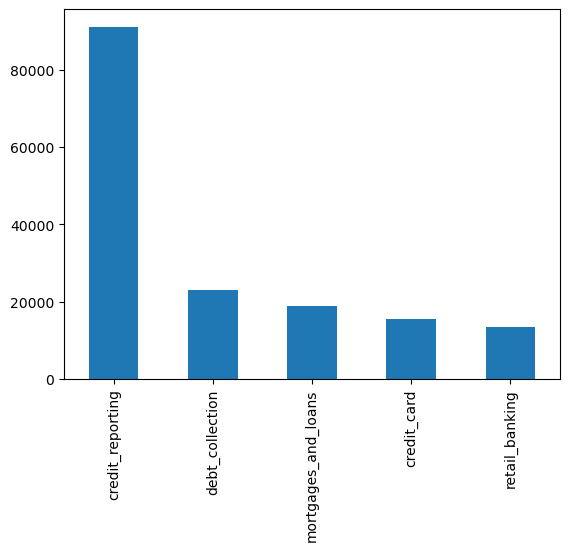

In [8]:
import matplotlib.pyplot as plt
df['product'].value_counts().plot(kind='bar')

In [ ]:
#importing necessary modules and applying preprocessing steps

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import string


nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)
df['narrative'] = df['narrative'].apply(preprocess)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df['narrative']

0         purchas order day ship amount receiv product w...
1         forward messag date tue subject pleas investig...
2         forward messag cc sent friday pdt subject fina...
3         payment histori miss credit report special loa...
4         payment histori miss credit report made mistak...
                                ...                        
162416                                                 name
162417                                                 name
162418                                                 name
162419                                                 name
162420                                                 name
Name: narrative, Length: 162411, dtype: object

In [ ]:
#Applying tfidf vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['narrative'])
X

<162411x33614 sparse matrix of type '<class 'numpy.float64'>'
	with 8025075 stored elements in Compressed Sparse Row format>

In [ ]:
#Splitting the dataset for train and test and importing decision tree classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
y=df['product']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#Fitting

In [15]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Prediction

In [16]:
y_pred_DTC=DTC.predict(X_test)
y_pred_DTC

array(['retail_banking', 'credit_reporting', 'mortgages_and_loans', ...,
       'credit_reporting', 'credit_reporting', 'credit_reporting'],
      dtype=object)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_DTC))


                     precision    recall  f1-score   support

        credit_card       0.66      0.64      0.65      3132
   credit_reporting       0.89      0.93      0.91     18283
    debt_collection       0.73      0.69      0.71      4615
mortgages_and_loans       0.76      0.72      0.74      3770
     retail_banking       0.74      0.73      0.73      2683

           accuracy                           0.82     32483
          macro avg       0.76      0.74      0.75     32483
       weighted avg       0.82      0.82      0.82     32483



In [ ]:
#Random Forest classifier model

In [18]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred_RFC=RFC.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred_RFC))

                     precision    recall  f1-score   support

        credit_card       0.83      0.68      0.74      3132
   credit_reporting       0.88      0.98      0.93     18283
    debt_collection       0.90      0.69      0.78      4615
mortgages_and_loans       0.86      0.79      0.83      3770
     retail_banking       0.85      0.84      0.85      2683

           accuracy                           0.87     32483
          macro avg       0.86      0.79      0.82     32483
       weighted avg       0.87      0.87      0.87     32483



In [ ]:
#Training the model with linear SVC

In [20]:
from sklearn.svm import LinearSVC
LVC=LinearSVC()
LVC.fit(X_train,y_train)
y_pred_LVC=LVC.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred_LVC))

                     precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3132
   credit_reporting       0.90      0.93      0.92     18283
    debt_collection       0.81      0.73      0.76      4615
mortgages_and_loans       0.84      0.82      0.83      3770
     retail_banking       0.86      0.88      0.87      2683

           accuracy                           0.87     32483
          macro avg       0.84      0.83      0.83     32483
       weighted avg       0.87      0.87      0.87     32483



In [22]:
#CREDITS:

In [23]:
#PRE-PROCESSING: VISHNUVARTHAN V K (DS225229147)

In [24]:
#VECTORIZATION AND DATA EXPLORATION: YUVARAJ R (DS225229149)

In [25]:
#MODEL BUILDING: INFANT YEHOSHUA J (DS225229115)

In [26]:
#METRICS CALCULATION: BALA MURUGAN P (DS225229150)